<a href="https://colab.research.google.com/github/BOOSAMADHANMOHANREDDY/UPGRAD/blob/main/supermallgrosarysaleview.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
##Supermart Grocery Sales - Retail Analytics Dataset

In [ ]:
##1: Import Required Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


In [ ]:
##2: Load the Dataset
data = pd.read_csv('/supermart_grocery_sales.csv')

In [ ]:
# Display the first few rows of the dataset
print(data.head())

  Order ID Customer Name          Category      Sub Category         City  \
0      OD1        Harish      Oil & Masala           Masalas      Vellore   
1      OD2         Sudha         Beverages     Health Drinks  Krishnagiri   
2      OD3       Hussain       Food Grains      Atta & Flour   Perambalur   
3      OD4       Jackson  Fruits & Veggies  Fresh Vegetables   Dharmapuri   
4      OD5       Ridhesh       Food Grains   Organic Staples         Ooty   

   Order Date Region  Sales  Discount  Profit       State  
0  11-08-2017  North   1254      0.12  401.28  Tamil Nadu  
1  11-08-2017  South    749      0.18  149.80  Tamil Nadu  
2  06-12-2017   West   2360      0.21  165.20  Tamil Nadu  
3  10-11-2016  South    896      0.25   89.60  Tamil Nadu  
4  10-11-2016  South   2355      0.26  918.45  Tamil Nadu  


In [33]:
# prompt: ##Step 3: Data Preprocessing

# Display basic information about the dataset
print(data.info())

# Check for missing values
print(data.isnull().sum())

# Handle missing values (example: fill with mean for numerical features)
numerical_cols = data.select_dtypes(include=np.number).columns
for col in numerical_cols:
    if data[col].isnull().any():
        data[col].fillna(data[col].mean(), inplace=True)

# Handle missing values (example: fill with mode for categorical features)
categorical_cols = data.select_dtypes(exclude=np.number).columns
for col in categorical_cols:
    if data[col].isnull().any():
        data[col].fillna(data[col].mode()[0], inplace=True)

# Verify if missing values are handled
print(data.isnull().sum())

# Convert categorical features to numerical using Label Encoding
label_encoders = {}
for column in data.select_dtypes(include=['object']).columns:
    label_encoders[column] = LabelEncoder()
    data[column] = label_encoders[column].fit_transform(data[column])

# Display the updated dataset with encoded features
print(data.head())
data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Order ID       9994 non-null   int64         
 1   Customer Name  9994 non-null   int64         
 2   Category       9994 non-null   int64         
 3   Sub Category   9994 non-null   int64         
 4   City           9994 non-null   int64         
 5   Order Date     9994 non-null   datetime64[ns]
 6   Region         9994 non-null   int64         
 7   Sales          9994 non-null   int64         
 8   Discount       9994 non-null   float64       
 9   Profit         9994 non-null   float64       
 10  State          9994 non-null   int64         
 11  Order Day      9994 non-null   int32         
 12  Order Month    9994 non-null   int32         
 13  Order Year     9994 non-null   int32         
dtypes: datetime64[ns](1), float64(2), int32(3), int64(8)
memory usage: 976.1

,Order ID,Customer Name,Category,Sub Category,City,Order Date,Region,Sales,Discount,Profit,State,Order Day,Order Month,Order Year
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000,9994,9994.000000,9994.000000,9994.000000,9994.000000,9994.0,9994.0,9994.0,9994.0
mean,4996.500000,24.543326,3.015309,11.090855,11.429258,1970-01-01 00:00:00.000000643,2.053132,1496.596158,0.226817,374.937082,0.0,1.0,1.0,1970.0
min,0.000000,0.000000,0.000000,0.000000,0.000000,1970-01-01 00:00:00,0.000000,500.000000,0.100000,25.250000,0.0,1.0,1.0,1970.0
25%,2498.250000,12.000000,1.000000,5.000000,6.000000,1970-01-01 00:00:00.000000358,1.000000,1000.000000,0.160000,180.022500,0.0,1.0,1.0,1970.0
50%,4996.500000,25.000000,3.000000,11.000000,11.000000,1970-01-01 00:00:00.000000627,1.000000,1498.000000,0.230000,320.780000,0.0,1.0,1.0,1970.0
75%,7494.750000,37.000000,5.000000,17.000000,17.000000,1970-01-01 00:00:00.000000927,4.000000,1994.750000,0.290000,525.627500,0.0,1.0,1.0,1970.0
max,9993.000000,49.000000,6.000000,22.000000,23.000000,1970-01-01 00:00:00.000001235,4.000000,2500.000000,0.350000,1120.950000,0.0,1.0,1.0,1970.0
std,2885.163629,14.427712,2.008006,6.677107,6.931600,NaN,1.629766,577.559036,0.074636,239.932881,0.0,0.0,0.0,0.0


In [ ]:
# Check for missing values
print(data.isnull().sum())

Order ID         0
Customer Name    0
Category         0
Sub Category     0
City             0
Order Date       0
Region           0
Sales            0
Discount         0
Profit           0
State            0
dtype: int64


In [ ]:
# Drop any rows with missing values
data.dropna(inplace=True)

In [ ]:
# Check for duplicates
data.drop_duplicates(inplace=True)

In [29]:
# Convert 'Order Date' to datetime format
data['Order Date'] = pd.to_datetime(data['Order Date'])

In [30]:
# Extract day, month, and year from 'Order Date'
data['Order Month'] = data['Order Date'].dt.month
data['Order Day'] = data['Order Date'].dt.day
data['Order Year'] = data['Order Date'].dt.year
data['Order Day']
data['Order Month']
data['Order Year']

,Order Year
0,1970
1,1970
2,1970
3,1970
4,1970
...,...
9989,1970
9990,1970
9991,1970
9992,1970


In [ ]:
##3.Label Encoding for Categorical Variables

In [ ]:
# Initialize the label encoder
le = LabelEncoder()

In [31]:
## Encode categorical variables
data['Category'] = le.fit_transform(data['Category'])
data['Sub Category'] = le.fit_transform(data['Sub Category'])
data['City'] = le.fit_transform(data['City'])
data['Region'] = le.fit_transform(data['Region'])
data['State'] = le.fit_transform(data['State'])
data['Month'] = le.fit_transform(data['Month'])

KeyError: 'Month'

In [22]:
## Display the first few rows after encoding
print(data.head())

   Order ID  Customer Name  Category  Sub Category  City  \
0         0             12         5            14    21   
1      1111             37         1            13     8   
2      2222             14         3             0    13   
3      3333             15         4            12     4   
4      4444             28         3            18    12   

                     Order Date  Region  Sales  Discount  Profit  State  \
0 1970-01-01 00:00:00.000000539       2   1254      0.12  401.28      0   
1 1970-01-01 00:00:00.000000539       3    749      0.18  149.80      0   
2 1970-01-01 00:00:00.000000226       4   2360      0.21  165.20      0   
3 1970-01-01 00:00:00.000000439       3    896      0.25   89.60      0   
4 1970-01-01 00:00:00.000000439       3   2355      0.26  918.45      0   

   Order Day  Order Month  Order Year  
0          1            1        1970  
1          1            1        1970  
2          1            1        1970  
3          1            1   

In [23]:
##Step 4: Exploratory Data Analysis (EDA)

<ipython-input-24-242806b64ecb>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Category', y='Sales', data=data, palette='Set2')


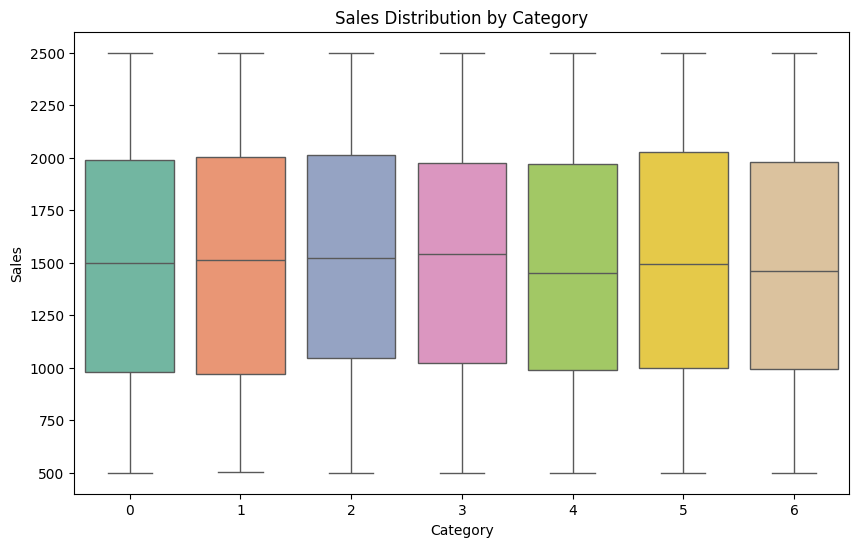

In [24]:
##1. Distribution of Sales by Category
plt.figure(figsize=(10, 6))
sns.boxplot(x='Category', y='Sales', data=data, palette='Set2')
plt.title('Sales Distribution by Category')
plt.xlabel('Category')
plt.ylabel('Sales')
plt.show()

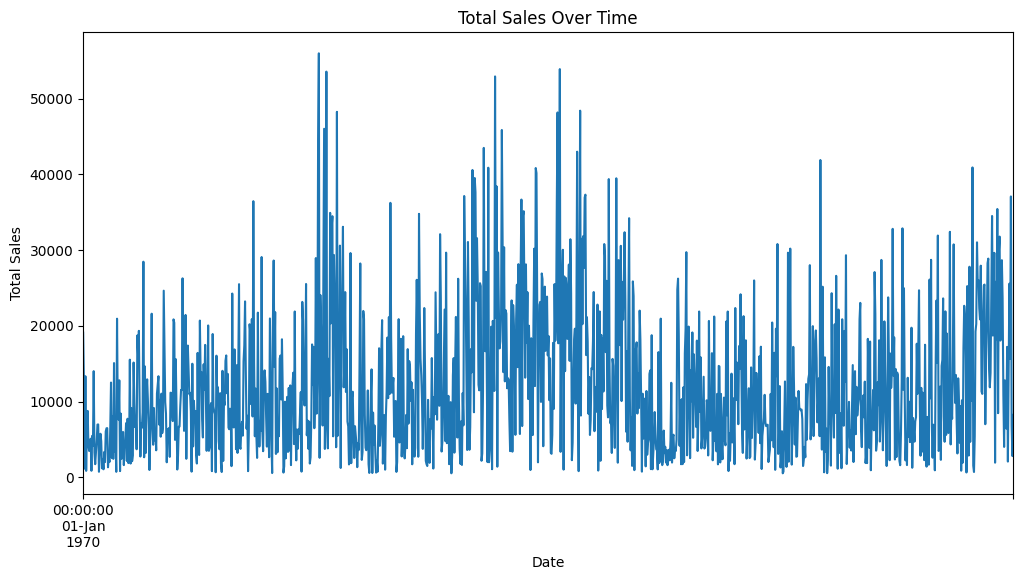

In [35]:
##2. Sales Trends Over Time
plt.figure(figsize=(12, 6))
data.groupby('Order Date')['Sales'].sum().plot()
plt.title('Total Sales Over Time')
plt.xlabel('Date')
plt.ylabel('Total Sales')
plt.show()

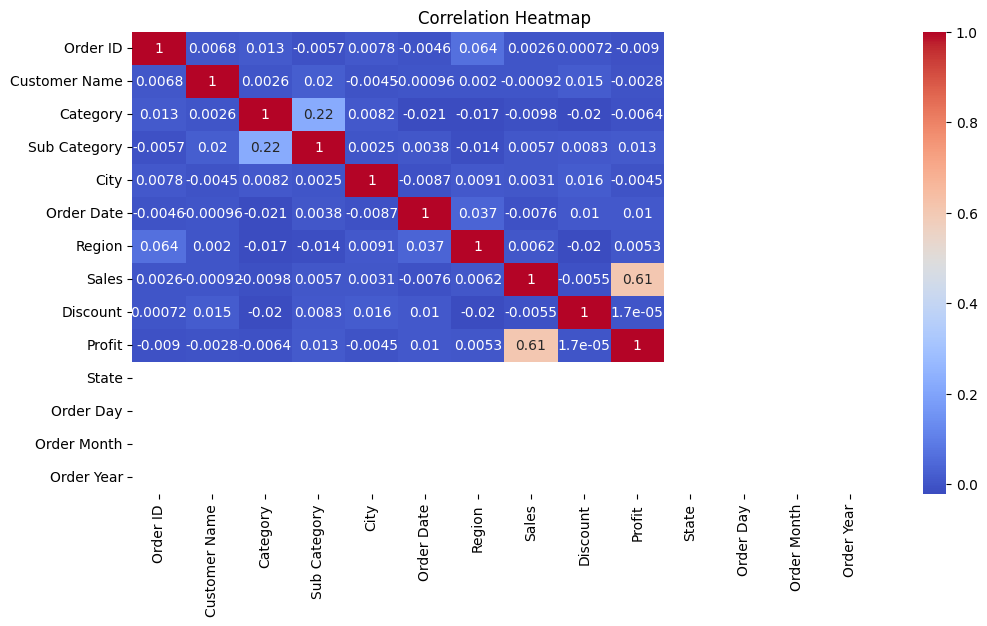

In [34]:
##3. Correlation Heatmap
plt.figure(figsize=(12, 6))
corr_matrix = data.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()


In [37]:
# Select features and target variable
features = data.drop(columns=['Order ID', 'Customer Name',
'Order Date', 'Sales'])
target = data['Sales']
target

,Sales
0,1254
1,749
2,2360
3,896
4,2355
...,...
9989,945
9990,1195
9991,1567
9992,1659


In [38]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features,
target, test_size=0.2, random_state=42)

In [39]:
# Feature scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
##Step 6: Train a Linear Regression Model


In [42]:
# Initialize the model
model = LinearRegression()
# Train the model
model.fit(X_train, y_train)
# Make predictions
y_pred = model.predict(X_test)

In [ ]:
###Step 7: Evaluate the Model

In [45]:
# Calculate MSE and R-squared
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

Mean Squared Error: 212824.5973664153
R-squared: 0.3547183704729946


In [ ]:
###Step 8: Visualize the Results

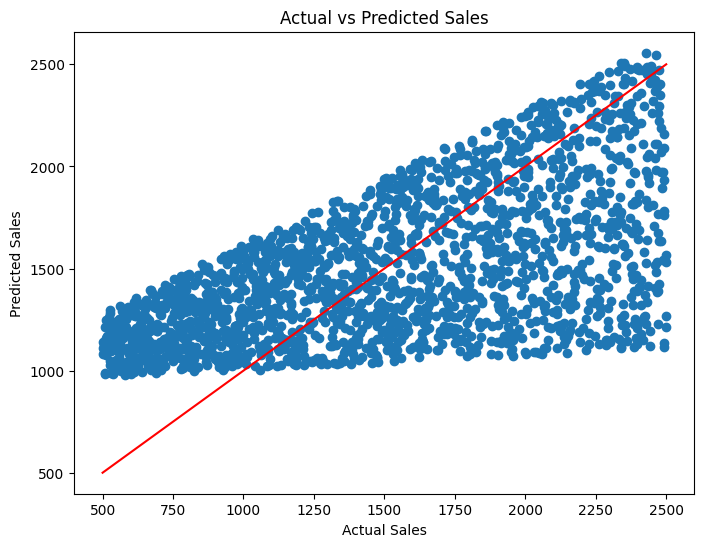

In [46]:
##1. Actual vs Predicted Sales
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred)
plt.plot([min(y_test), max(y_test)], [min(y_test),
max(y_test)], color='red')
plt.title('Actual vs Predicted Sales')
plt.xlabel('Actual Sales')
plt.ylabel('Predicted Sales')
plt.show()